# population

In [176]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [177]:
#%pip install geopandas

In [178]:
url = 'https://en.wikipedia.org/wiki/Provinces_of_Cambodia'
headers = {'User-Agent': 'Mozilla/5.0'}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

In [179]:
table = soup.find_all('table')

In [180]:
# 1. Use a CSS selector to find the table with the 'sortable' class directly
city_table = soup.find('table', class_='sortable')

if city_table:
    rows = city_table.find_all('tr')
    data = []
    for row in rows:
        cols = row.find_all('td')
        # Check for 8 columns (some rows might be headers or footers)
        if len(cols) >= 8:
            data.append({
                'Name': cols[1].get_text(strip=True),
                'Khmer': cols[2].get_text(strip=True),
                'Ungegn': cols[3].get_text(strip=True),
                'Capital': cols[4].get_text(strip=True),
                'Population': cols[5].get_text(strip=True),
                'Area_km2': cols[6].get_text(strip=True),
                'Density_km2': cols[7].get_text(strip=True),
                'Iso_code': cols[8].get_text(strip=True)
            })
            
    df = pd.DataFrame(data)

    # 2. Critical: Data Cleaning
    # Remove commas and any non-numeric characters (like [1] references)
    df['Population'] = df['Population'].str.replace(r'[^\d]', '', regex=True)
    
    # Convert to numeric, turning empty strings into NaN, then fill with 0
    df['Population'] = pd.to_numeric(df['Population'], errors='coerce').fillna(0).astype(int)
else:
    print("Table not found. Check if the 'soup' object contains the right HTML.")

In [181]:
df

,Name,Khmer,Ungegn,Capital,Population,Area_km2,Density_km2,Iso_code
0,Banteay Meanchey,បន្ទាយមានជ័យ,Bântéay Méanchoăy,Serei Saophoan Municipality,898484,"6,679",135,KH-1
1,Battambang,បាត់ដំបង,Bătdâmbâng,Battambang Municipality,1132017,"11,702",97,KH-2
2,Kampong Cham,កំពង់ចាម,Kâmpóng Cham,Kampong Cham Municipality,1062914,"4,549",234,KH-3
3,Kampong Chhnang,កំពង់ឆ្នាំង,Kâmpóng Chhnăng,Kampong Chhnang Municipality,604895,"5,521",110,KH-4
4,Kampong Speu,កំពង់ស្ពឺ,Kâmpóng Spœ,Chbar Mon Municipality,924175,"7,017",132,KH-5
5,Kampong Thom,កំពង់ធំ,Kâmpóng Thum,Steung Saen Municipality,807254,"13,814",58,KH-6
6,Kampot,កំពត,Kâmpót,Kampot Municipality,682987,"4,873",140,KH-7
7,Kandal,កណ្តាល,Kândal,Ta Khmau Municipality,1352198,"3,179",425,KH-8
8,Kep,កែប,Kêb,Kep Municipality,48772,336,145,KH-23
9,Koh Kong,កោះកុង,Kaôh Kŏng,Khemarak Phoumin Municipality,140962,"10,090",14,KH-9


In [182]:
df['Name'] = df['Name'].replace({"Kratié": "Kratie", 
                                 "Takéo": "Takeo",
                                 "Ratanakiri": "Ratanak Kiri",
                                 "Siem Reap": "Siemreap",
                                 "Mondulkiri": "Mondul Kiri",})

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         25 non-null     object
 1   Khmer        25 non-null     object
 2   Ungegn       25 non-null     object
 3   Capital      25 non-null     object
 4   Population   25 non-null     int64 
 5   Area_km2     25 non-null     object
 6   Density_km2  25 non-null     object
 7   Iso_code     25 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.7+ KB


In [184]:
df['Population'].sum()

np.int64(17280543)

In [185]:
file_path = r"C:\Users\ASUS_PC\OneDrive\Desktop\Project_cum_Stain\khm_admbnda_adm1_gov.shp"
country_shapefile = gpd.read_file(file_path)
country_shapefile

,OBJECTID,Level,HRName,HRPCode,HRParent,PRO_CODE,geometry
0,4,1.0,Kampong Chhnang,KH04,KH,4,"MULTIPOLYGON (((440699.69 1383262.499, 440509...."
1,8,1.0,Kandal,KH08,KH,8,"POLYGON ((481642.597 1313038.874, 481826.346 1..."
2,12,1.0,Phnom Penh,KH12,KH,12,"POLYGON ((491955.253 1297055.749, 492168.065 1..."
3,14,1.0,Prey Veng,KH14,KH,14,"POLYGON ((536430.378 1311312.624, 536588.378 1..."
4,20,1.0,Svay Rieng,KH20,KH,20,"POLYGON ((588415.252 1281966.749, 588643.752 1..."
5,5,1.0,Kampong Speu,KH05,KH,5,"POLYGON ((414422.691 1330571.624, 414429.597 1..."
6,7,1.0,Kampot,KH07,KH,7,"MULTIPOLYGON (((415760.376 1167674.706, 415800..."
7,9,1.0,Koh Kong,KH09,KH,9,"MULTIPOLYGON (((303721.788 1194846.122, 303822..."
8,18,1.0,Preah Sihanouk,KH18,KH,18,"MULTIPOLYGON (((368805.123 1149997.595, 368742..."
9,21,1.0,Takeo,KH21,KH,21,"POLYGON ((478804.721 1254690.249, 478995.409 1..."


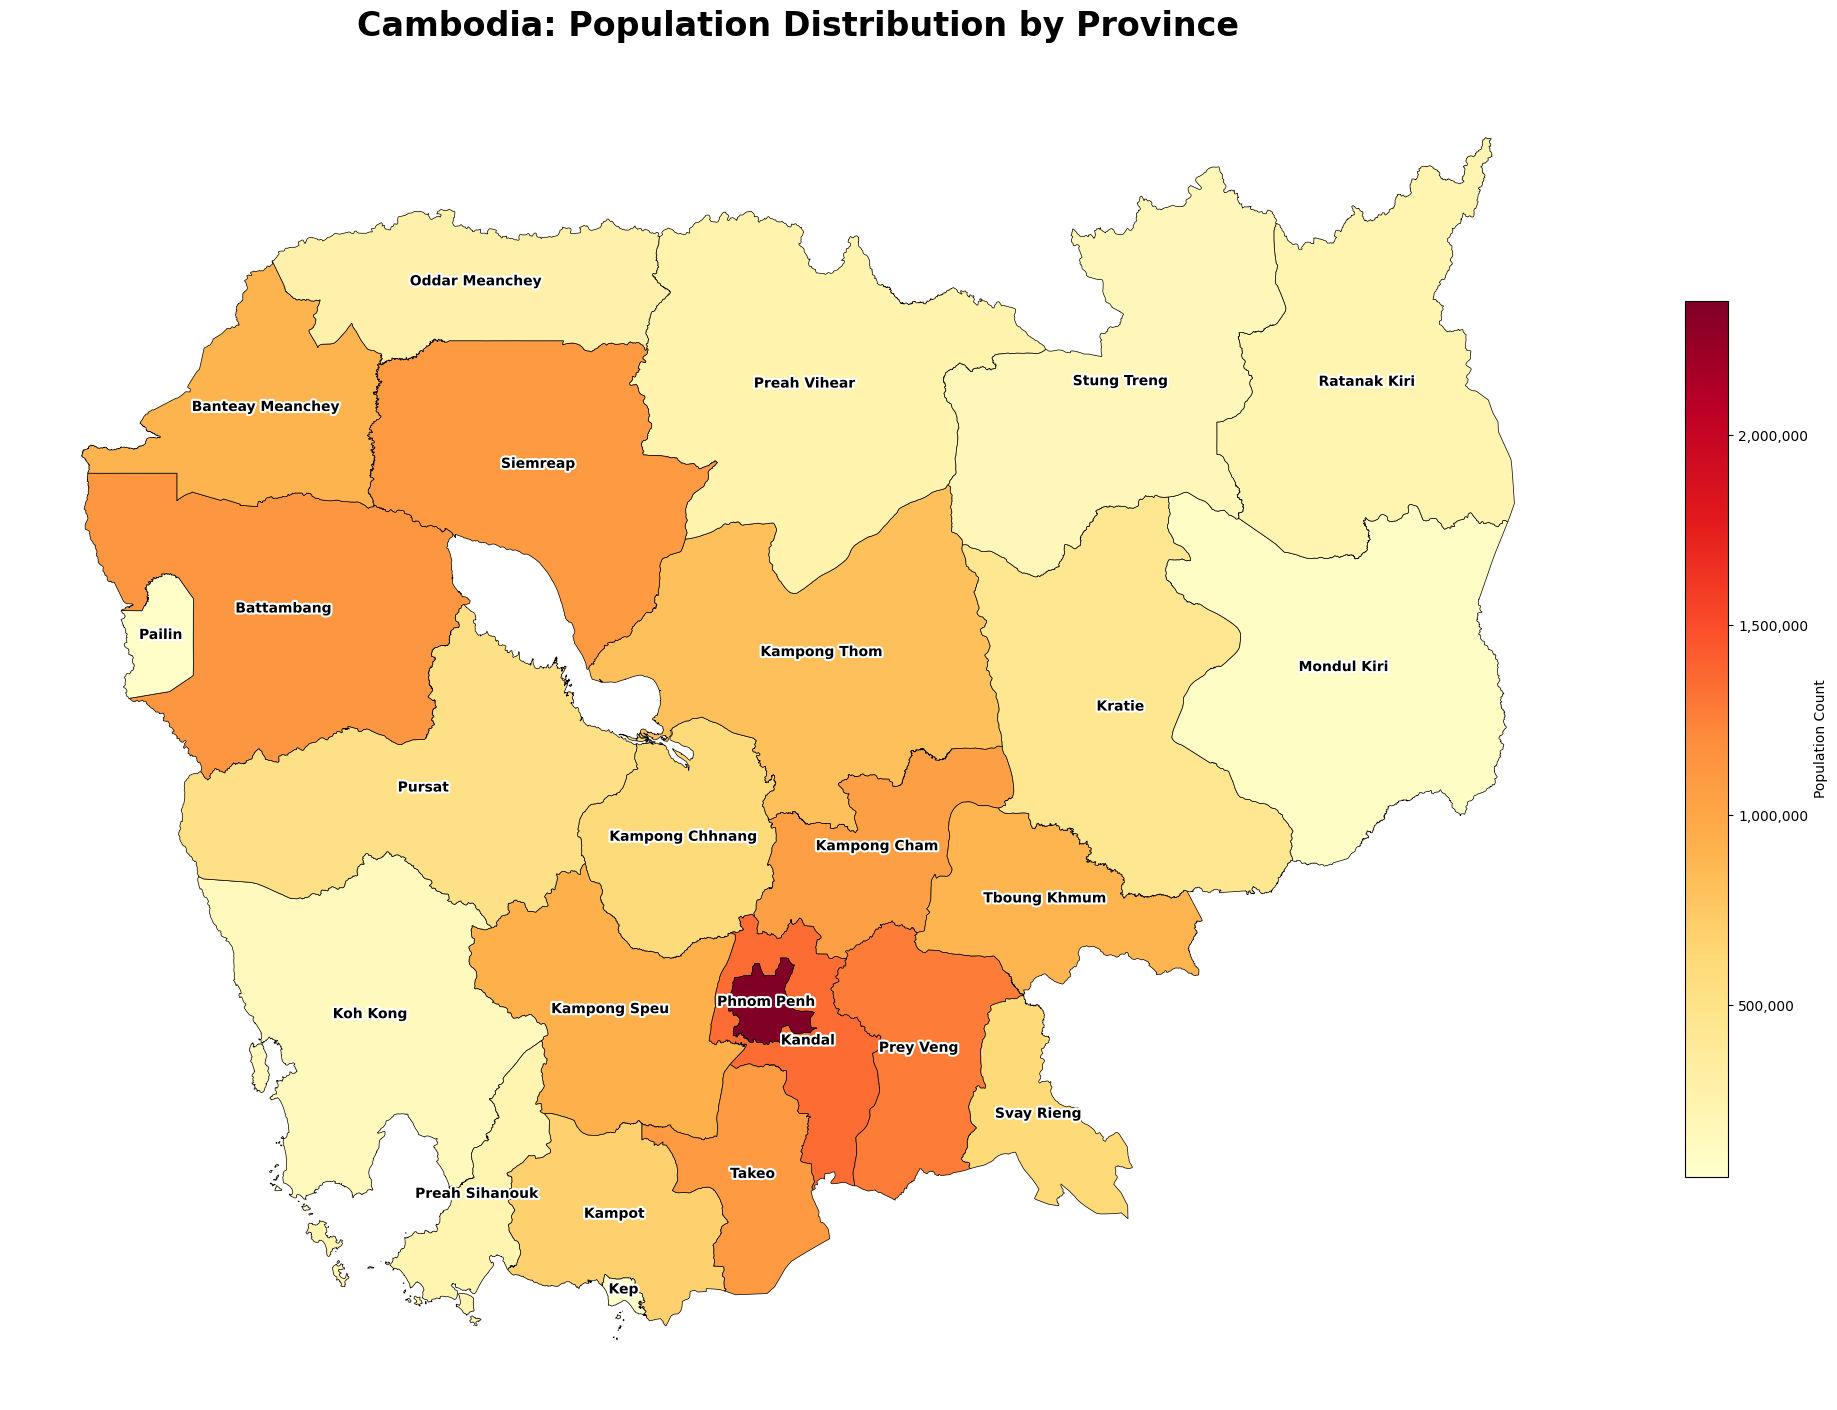

In [186]:
import matplotlib.ticker as ticker
from matplotlib.patheffects import withStroke

# 1. Setup the figure size for a high-res look
fig, ax = plt.subplots(1, 1, figsize=(20, 15))
merged = country_shapefile.merge(df, left_on='HRName', right_on='Name')
# 2. Plot the map with a clearer color bar
# We use 'YlOrRd' for better visibility of province names
plot = merged.plot(column='Population', 
                   ax=ax, 
                   legend=True, 
                   cmap='YlOrRd', 
                   edgecolor='black', 
                   linewidth=0.5,
                   legend_kwds={
                       'label': "Population Count",
                       'orientation': "vertical",
                       'shrink': 0.6,
                       'format': ticker.FuncFormatter(lambda x, p: format(int(x), ','))
                   })

# 3. Add Province Names at the center of each shape
for idx, row in merged.iterrows():
    if pd.notnull(row['Name']): # Using 'Khmer' column for English names from your df
        centroid = row['geometry'].centroid
        ax.annotate(text=row['Name'], 
                    xy=(centroid.x, centroid.y),
                    horizontalalignment='center', 
                    fontsize=10, 
                    fontweight='bold',
                    color='black',
                    # This adds the white 'glow' so text is readable over dark colors
                    path_effects=[withStroke(linewidth=3, foreground="white")])

# 4. Final Styling
ax.set_title('Cambodia: Population Distribution by Province', fontsize=24, pad=30, fontweight='bold')
ax.axis('off') 

plt.tight_layout()
plt.show()